## EAD 1 - VERIFICANDO AS PRIMEIRAS INFORMAÇÕES

1. Quais são os videos mais assitidos (TOP 10)?
2. Views por dia = views / (data - upload_date)
2. Qual é a quantidade total de videos para cada busca (query)?
3. Qual é a curva de views para cada busca?
4. Qual user tem mais views?
5. Qual é a media de views por video por user?
6. Qual a palavra/corte mais comum no título dos videos?
7. Quais informações temos na descrição do video?

In [51]:
import db
import pandas as pd
import seaborn as sns

In [2]:
# Coleta dados do banco
db.db_conection_eng()
dim = db.load_dimensao_youtube()
des = db.load_description_youtube()
view = db.load_views_youtube()

In [8]:
# Merge entre as tabelas
df = dim.merge(des, how='left', on='id')
df = df.merge(view, how='left', on='id')

In [11]:
df.columns

Index(['id', 'uploader', 'uploader_id', 'uploader_url', 'channel_id',
       'channel_url', 'upload_date', 'license', 'creator', 'title',
       'alt_title', 'thumbnails', 'description_x', 'categories', 'tags',
       'subtitles', 'automatic_captions', 'duration', 'age_limit',
       'annotations', 'chapters', 'webpage_url', 'view_count_x',
       'like_count_x', 'dislike_count_x', 'average_rating_x', 'formats',
       'is_live', 'start_time', 'end_time', 'series', 'season_number',
       'episode_number', 'track', 'artist', 'album', 'release_date',
       'release_year', 'subscriber_count', 'extractor', 'webpage_url_basename',
       'extractor_key', 'n_entries', 'playlist', 'playlist_id',
       'playlist_title', 'playlist_uploader', 'playlist_uploader_id',
       'playlist_index', 'thumbnail', 'display_id', 'requested_subtitles',
       'requested_formats', 'format', 'format_id', 'ext', 'width', 'height',
       'resolution', 'fps', 'vcodec', 'vbr', 'stretched_ratio', 'acodec',
    

In [28]:
# Cria coluna com quantidade de dias do video
df = df.convert_dtypes(infer_objects=False)
df['upload_date'] = pd.to_datetime(df['upload_date'])
df['data'] = pd.to_datetime(df['data'])
df['dias'] = df['data']-df['upload_date']
df['dias'] = df['dias'].dt.days
df['views_dia'] = df['view_count_y'] / df['dias']

In [44]:
# Item 1
print('Quais são os videos mais assitidos (TOP 10)?')
df[['uploader','title','view_count_y']].sort_values('view_count_y',ascending=False).iloc[0:10,]

,uploader,title,view_count_y
148,MasterChef Brasil,MASTERCHEF BRASIL (22/05/2018) | PARTE 4 | EP ...,2537195
139,MasterChef Brasil,MASTERCHEF PROFISSIONAIS (15/11/2016) | PARTE ...,2295566
46,Marcelo Bolinha Carnes,SADDLE OF LAMB | GARUPA DE CORDEIRO,1206023
4,ecocss1,Aprenda a temperar a carne de carneiro - Globo...,1067472
177,Cozinhando com Fernando Couto,Batatas Assadas para Acompanhamento de carnes ...,953109
12,Mohamad Hindi,CORDEIRO ASSADO DEBAIXO DA TERRA ft. Guto Quir...,919046
29,Marcelo Bolinha Carnes,CORDEIRO NA ESTACA,854765
24,Marcelo Bolinha Carnes,BOLINHA E ZE ALMIRO - CORDEIRO COM CARRETEIRO,665328
21,O Agro Nosso,Conheça a raça Dorper para produção de carne d...,592198
110,Erick Jacquin,COMIDA DE VERDADE: CANELA DE CORDEIRO BRASEADA...,587861


In [48]:
# Item 2
print('Quais são os videos com maior média de views por dia (TOP 10)?')
df[['uploader','title','views_dia']].sort_values('views_dia',ascending=False).iloc[0:10,]

,uploader,title,views_dia
24,Marcelo Bolinha Carnes,BOLINHA E ZE ALMIRO - CORDEIRO COM CARRETEIRO,3326.64
148,MasterChef Brasil,MASTERCHEF BRASIL (22/05/2018) | PARTE 4 | EP ...,2416.37619
29,Marcelo Bolinha Carnes,CORDEIRO NA ESTACA,1920.820225
110,Erick Jacquin,COMIDA DE VERDADE: CANELA DE CORDEIRO BRASEADA...,1854.451104
46,Marcelo Bolinha Carnes,SADDLE OF LAMB | GARUPA DE CORDEIRO,1821.787009
12,Mohamad Hindi,CORDEIRO ASSADO DEBAIXO DA TERRA ft. Guto Quir...,1445.040881
139,MasterChef Brasil,MASTERCHEF PROFISSIONAIS (15/11/2016) | PARTE ...,1432.043668
6,Marcelo Bolinha Carnes,WINE AND GARLIC LEG OF LAMB | PERNIL DE CORDEI...,1185.541516
3,Erick Jacquin,CARRÉ DE CORDEIRO DO JEITO QUE AMO | ERICK JAC...,1108.447248
126,Marcelo Bolinha Carnes,PERNIL DE CORDEIRO NO FORNO DE BARRO | LEG OF ...,1054.056818


In [50]:
# Item 3
print('Qual é a quantidade total de videos para cada busca (query)?')
len(df['id'])

Qual é a quantidade total de videos para cada busca (query)?


190

Qual é a curva de views para cada busca?
 Menor que 250 mil: 173 
 Menor que 500 mil: 6 
 Maior que 1.000 mil: 7


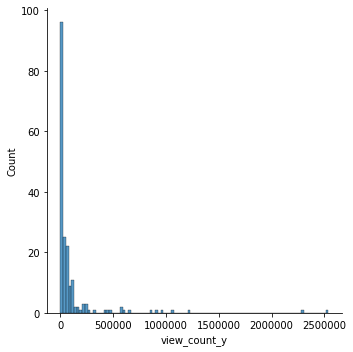

In [71]:
# Item 4
print('Qual é a curva de views para cada busca?')
a=df['view_count_y'][df['view_count_y'] < 250000].count()
b=df['view_count_y'][(df['view_count_y'] > 250000) & (df['view_count_y'] < 500000)].count()
c=df['view_count_y'][(df['view_count_y'] > 500000) & (df['view_count_y'] < 1000000)].count()
print(' Menor que 250 mil: {0} \n Menor que 500 mil: {1} \n Maior que 1.000 mil: {2}'.format(a,b,c))
sns.displot(df,x='view_count_y')

In [84]:
# Item 5
print('Qual user tem mais views (TOP15)?')
df.groupby(by=['uploader'])['view_count_y'].sum().sort_values(ascending=False)[0:15]

Qual user tem mais views (TOP15)?


uploader
MasterChef Brasil                                  4910183
Marcelo Bolinha Carnes                             3733443
Mohamad Hindi                                      1369630
Erick Jacquin                                      1071144
ecocss1                                            1067472
Cozinhando com Fernando Couto                       953109
Churrasqueadas                                      795886
O Agro Nosso                                        592302
TVU Lavras                                          577468
Netão Bom Beef                                      473989
Pesca - Atividades Mateiras - Tradições da Roça     422572
Apaixonado por Churrasco                            347511
Guto Quirós - Ovinocultura & Agronegócio            328957
Negócios da Terra                                   277722
ChefTaico                                           265059
Name: view_count_y, dtype: Int64

In [89]:
# Item 6
print('Videos por user?')
df.groupby(by=['uploader'])['id'].count().sort_values(ascending=False)[0:15]

Videos por user?


uploader
Guto Quirós - Ovinocultura & Agronegócio    23
Marcelo Bolinha Carnes                       9
Clube da Carne TV                            5
Churrasqueadas                               5
ChefTaico                                    4
Netão Bom Beef                               4
Apaixonado por Churrasco                     3
BBQ Em Casa - Receitas De Churrasco          3
Cursos CPT                                   3
Negócios da Terra                            3
MasterChef Brasil                            3
Nhac GNT                                     2
Erick Jacquin                                2
Carlos Aires Culinária                       2
Cansei de Ser Chef                           2
Name: id, dtype: int64

In [91]:
print('Qual é a media de views por video por user?(TOP15)')
df.groupby(by=['uploader'])['view_count_y'].mean().sort_values(ascending=False)[0:15]

Qual é a media de views por video por user?(TOP15)


uploader
MasterChef Brasil                                  1636727.666667
ecocss1                                                 1067472.0
Cozinhando com Fernando Couto                            953109.0
Mohamad Hindi                                            684815.0
TVU Lavras                                               577468.0
Erick Jacquin                                            535572.0
Pesca - Atividades Mateiras - Tradições da Roça          422572.0
Marcelo Bolinha Carnes                                   414827.0
O Agro Nosso                                             296151.0
kevin filmes                                             228171.0
Dia de Campo na TV                                       208965.0
Ana Maria Brogui                                         177904.0
Churrasqueadas                                           159177.2
A dona da cozinha                                        156649.0
PescaDinamica                                            139603.0
N

In [ ]:
# Item 7
print('Qual a palavra/corte mais comum no título dos videos?')
